In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [5]:
x=df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y=df['Performance Index']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred=model.predict(x_test)

In [9]:
model.predict([[7, 99, 1, 9, 1]])

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.82019447])

In [10]:
m=mean_absolute_error(y_test, y_pred)
mi=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(m)
print(mi)
print(r2)

1.6111213463123044
4.082628398521853
0.9889832909573145


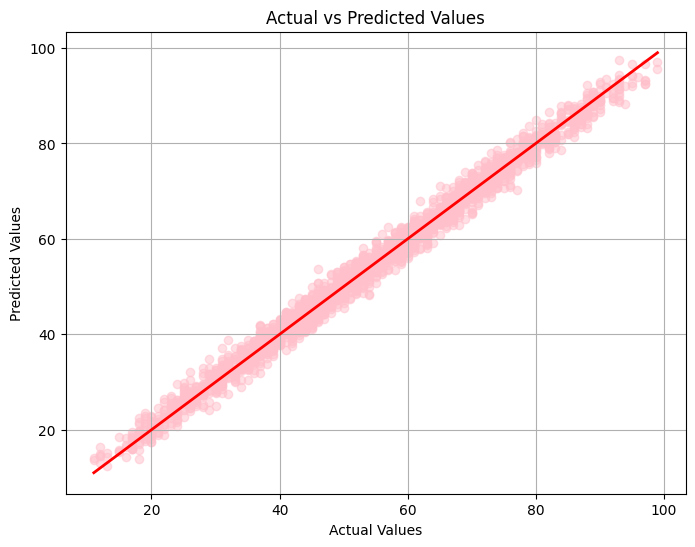

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='pink', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

C:\Users\Richee\AppData\Local\Temp\ipykernel_11424\3235160168.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual", shade=True)
C:\Users\Richee\AppData\Local\Temp\ipykernel_11424\3235160168.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted", shade=True)


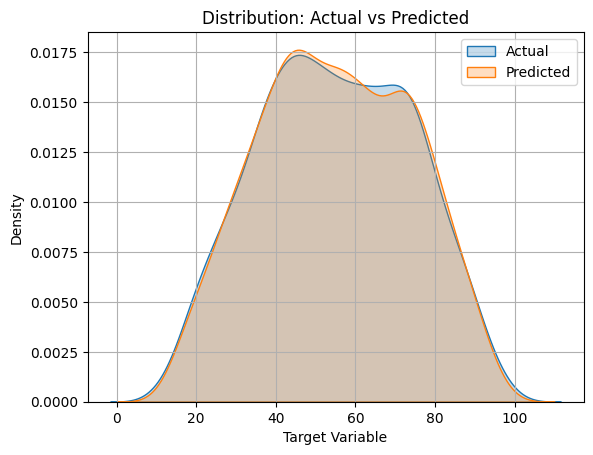

In [12]:
import seaborn as sns
sns.kdeplot(y_test, label="Actual", shade=True)
sns.kdeplot(y_pred, label="Predicted", shade=True)
plt.title("Distribution: Actual vs Predicted")
plt.xlabel("Target Variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


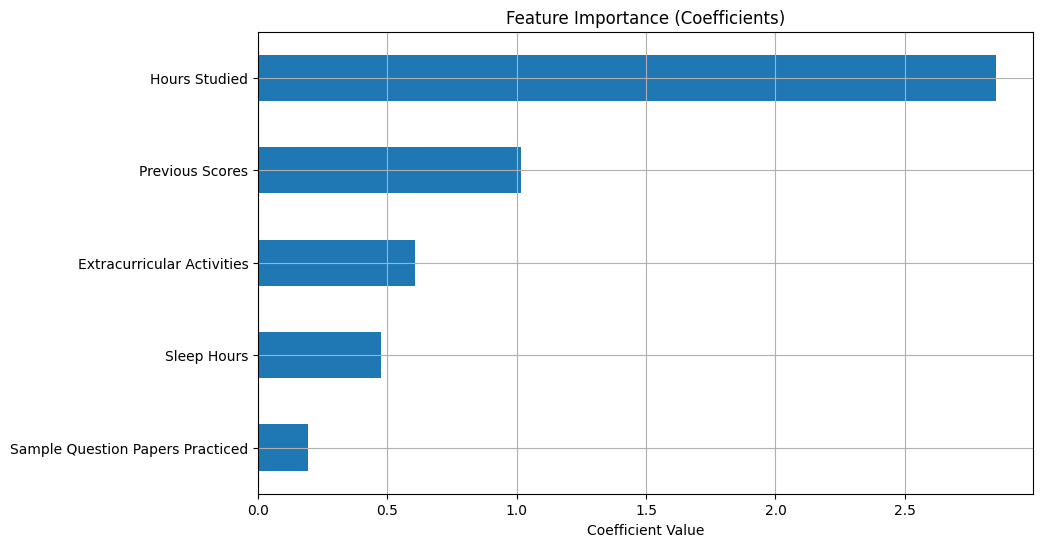

In [24]:
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()


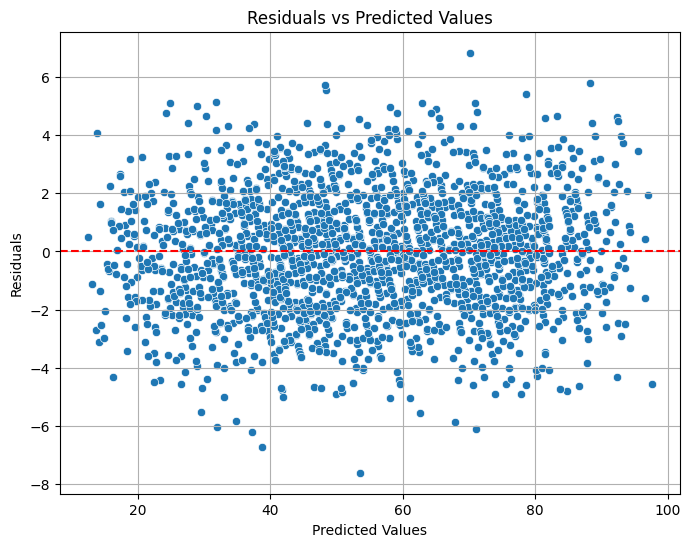

In [14]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()


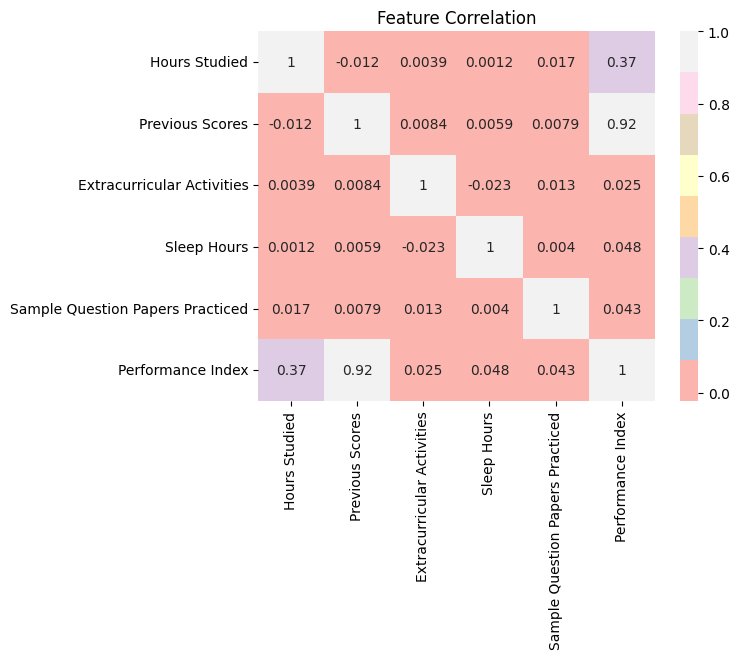

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='Pastel1')
plt.title("Feature Correlation")
plt.show()

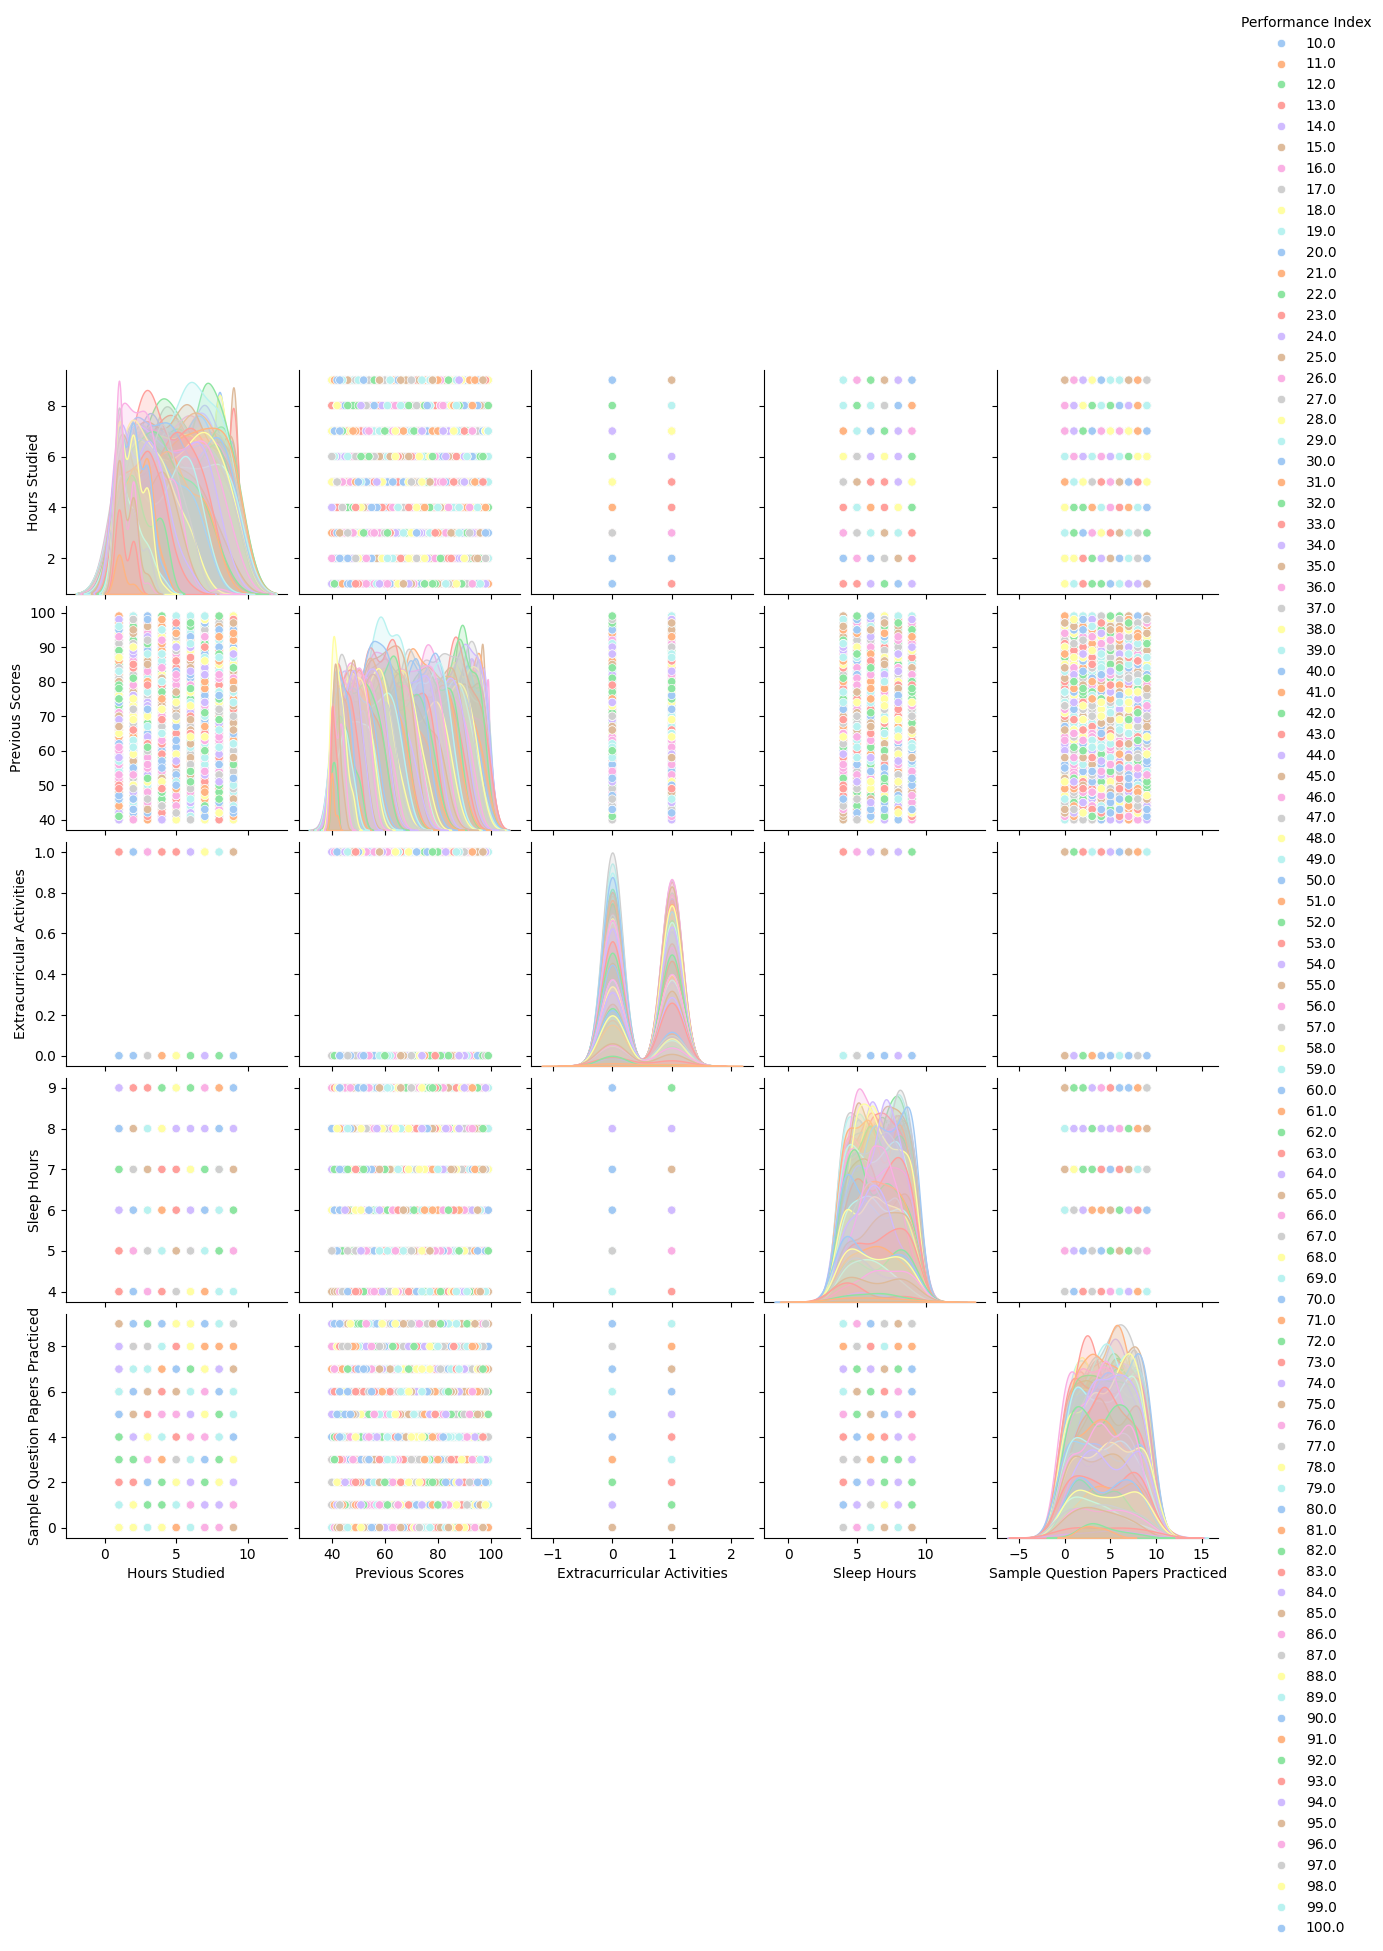

In [37]:
sns.pairplot(df, diag_kind="kde",hue="Performance Index", palette="pastel")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.6111213463123044
MSE: 4.082628398521853
R² Score: 0.9889832909573145


In [15]:
model.score(x_test,y_test)

0.9889832909573145